# Cohort Analysis

### Importing data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../processed_data/cleaned_df.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

### Making sure we have only the first purchase date for each customer

In [4]:
df_first_purchase = df.sort_values(['customer_id', 'date']).groupby('customer_id').first()
df_first_purchase.head()

,index,date,quantity,price
customer_id,,,,
1,0,1997-01-01,1,11.77
2,1,1997-01-12,1,12.00
3,3,1997-01-02,2,20.76
4,9,1997-01-01,2,29.33
5,13,1997-01-01,2,29.33


In [5]:
df_first_purchase.shape

(23570, 4)

In [11]:
print('First purchase date -> ',df['date'].min())
print('Last purchase date -> ',df['date'].max())

First purchase date ->  1997-01-01 00:00:00
Last purchase date ->  1998-06-30 00:00:00


### Visualizing all purchases within cohort

In [7]:
price_per_date = df_first_purchase.groupby('date')[['price']].sum()
price_per_date = price_per_date.reset_index()

In [8]:
price_per_date

,date,price
0,1997-01-01,7420.90
1,1997-01-02,7921.89
2,1997-01-03,7134.26
3,1997-01-04,6528.12
4,1997-01-05,9113.32
...,...,...
79,1997-03-21,7144.46
80,1997-03-22,8559.14
81,1997-03-23,9582.57
82,1997-03-24,9221.45


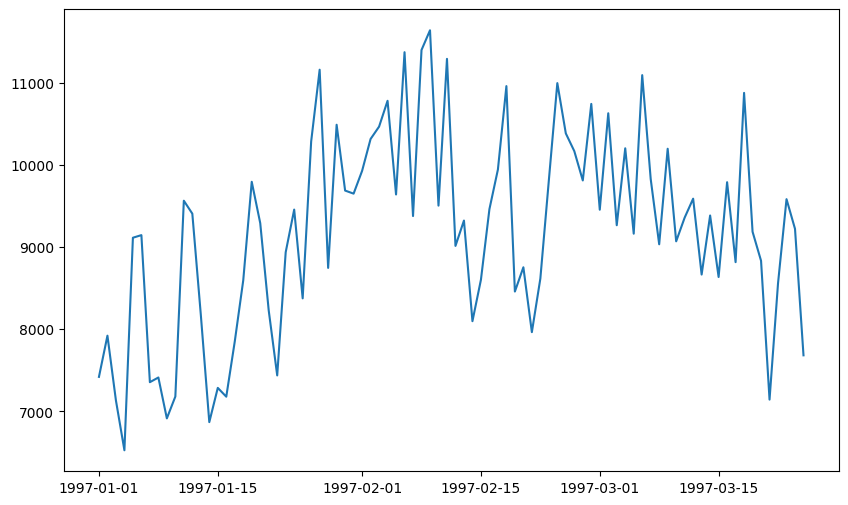

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(
  price_per_date['date'],
  price_per_date['price']
)
plt.show()

In [10]:
df_first_purchase.index

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       23561, 23562, 23563, 23564, 23565, 23566, 23567, 23568, 23569, 23570],
      dtype='int64', name='customer_id', length=23570)

### Visualizing Customer Purchases